# Analyse de systèmes dynamiques à l'aide de Python

## Approche théorique

Dans ce notebook, nous allons explorer graphiquement le comportement de solutions d'équations différentielles ordinaires en utilisant des champs de vecteurs et des courbes intégrales. Ce type d'analyse est essentiel dans l'étude des systèmes dynamiques, permettant de visualiser la stabilité et les dynamiques à long terme des solutions.

 En particulier, nous nous intéressons aux équations de la forme $ y' = y - y^2 $ et $ y' = y^2 $, ainsi qu'à une équation plus complexe $ y' = t - y^2 $ . À travers l'utilisation de Python et de la bibliothèque Matplotlib, nous allons visualiser non seulement les champs de vecteurs associés à ces équations, mais aussi tracer des courbes intégrales représentant des solutions spécifiques. Ces visualisations nous aideront à comprendre intuitivement la stabilité et les dynamiques à long terme des solutions de ces systèmes.

Dans la dernière section de ce document, nous etudierons une application concrete des equations différentielles pour prédire la population future d'une espèce dans un écosystème avec scikit learn.

### Préparation de l'environnement

Premierement nous importons d'abord les bibliothèques nécessaires pour notre analyse.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp, sin, cos, sqrt


Définissons ensuite les parametres de base pour la visualisation des champs de vecteurs et des courbes intégrales avec pyplot.

In [19]:
def trace(f, a, b, couleur, n=100):
    X = np.linspace(a, b, n)
    Y = [f(x) for x in X]
    plt.xlim(0.9, 2.1)
    axeox(a, b)
    segment(a, min(Y), a, max(Y), "black")
    segment(b, min(Y), b, max(Y), "black")
    plt.plot(X, Y, color=couleur)
    
def axeox(a, b):
    plt.plot([a-0.25, b+0.25], [0, 0], color="black")
    
def axeoy(c, d):
    plt.plot([0, 0], [c-0.5, d+0.5], color="black")
    
def segment(a1, b1, a2, b2, couleur="black"):
    plt.plot([a1, a2], [b1, b2], color=couleur)

def segment_pointille(a1, b1, a2, b2, couleur="black"):
    plt.plot([a1, a2], [b1, b2], '--', color=couleur)

def champ(f, a, b, c, d, N):
    x = np.linspace(a, b, N)
    y = np.linspace(c, d, N)
    X, Y = np.meshgrid(x, y)
    Tx = np.ones((N, N))
    Ty = f(X, Y)
    C = np.hypot(Tx, Ty)
    Tx = Tx / C
    Ty = Ty / C
    plt.quiver(X, Y, Tx, Ty, C)

### Analyse de l'équation $y' = y - y^2$

Explorons d'abord l'équation différentielle $ y′=y−y^2 $  à travers son champ de vecteurs et plusieurs courbes intégrales représentant ses solutions.

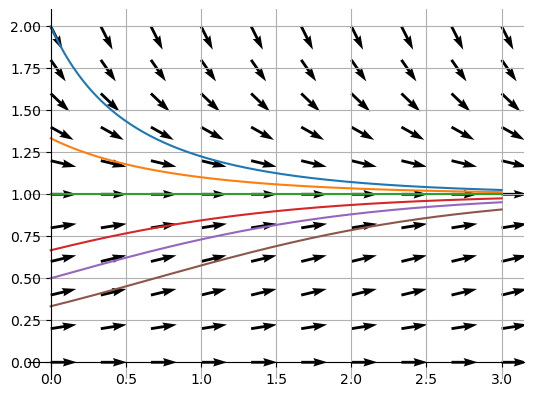

In [31]:
fig, ax = plt.subplots()

x = np.linspace(0, 3, 10)
y = np.linspace(0, 2, 11)

ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

X, Y=np.meshgrid(x, y)
u =np.ones_like(X)
v =Y - Y*Y
r =np.sqrt(u**2 + v**2)
u, v = u/r, v/r
plt.quiver(X, Y, u, v)

x = np.linspace(0,3,200)
solutions = [1 / (1 - np.exp(-x) / 2), 1 / (1 - np.exp(-x) / 4), np.ones_like(x),
             1 / (1 + np.exp(-x) / 2), 1 / (1 + np.exp(-x)), 1 / (1 + 2 * np.exp(-x))]
for y in solutions:
    plt.plot(x, y)
             
plt.show()

### Étude de l'équation $ y′=y^2 $

Poursuivons avec l'analyse de y′=y2y′=y2, en traçant différentes solutions pour mettre en évidence les caractéristiques de cette équation différentielle.

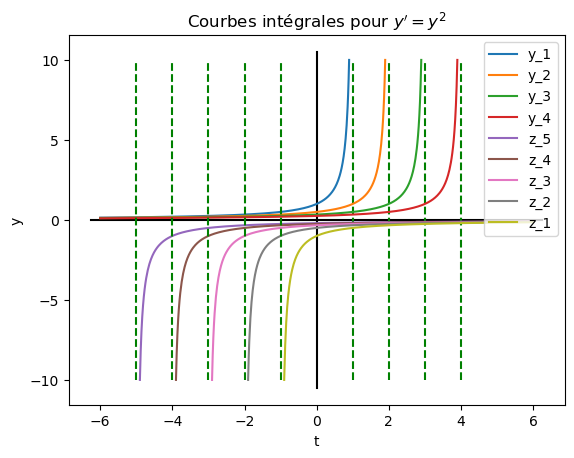

In [7]:
def f(t, c=1):
    return 1 / (c - t)

plt.clf()
a, b = -6, 6
axeox(a, b)
axeoy(-10, 10)
plt.xlabel('t')
plt.ylabel('y')

for c in range(1, 5):
    X = np.linspace(a, c - 0.1, 500)
    Y = [f(x, c) for x in X]
    plt.plot(X, Y, label=f"y_{c}")
    segment_pointille(c, -10, c, 10, "green")

for c in range(-5, 0):
    X = np.linspace(c + 0.1, b, 500)
    Y = [f(x, c) for x in X]
    plt.plot(X, Y, label=f"z_{abs(c)}")
    segment_pointille(c, -10, c, 10, "green")

plt.legend(loc='upper right')
plt.title("Courbes intégrales pour $y'=y^2$")
plt.show()


### Champ de vecteurs pour $ y′=t−y^2 $

Enfin, examinons le champ de vecteurs pour l'équation $ y′=t−y^2 $ et ajoutons les isoclines pour compléter notre analyse.

Text(0.5, 1.0, "champ de vecteurs $y'=t-y^2$")

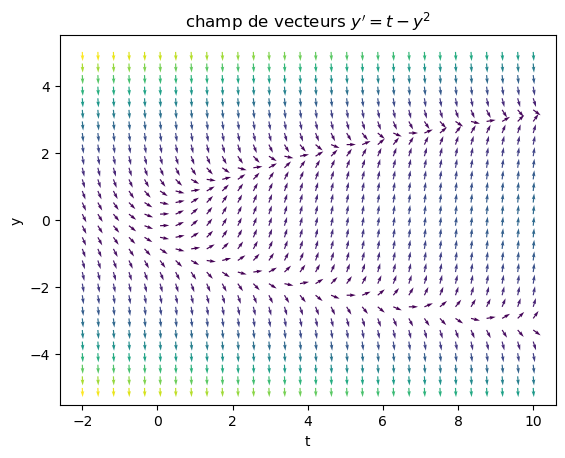

In [10]:
def  f(t,y):
    return t-y**2
plt.clf()
a=-5;b=10
plt.xlabel('t')
plt.ylabel('y')

champ(f,-2,10,-5,5,30)
plt.title("champ de vecteurs $y'=t-y^2$")

## Application Concrete à une population

En utilisant scikit-learn nous allons creer un modèle prédictif basé sur les données générées à partir de nos équations différentielles précédentes. Ce modèle sera entraîné pour prédire l'évolution future des systèmes analysés.

### Contexte 

Supposons que nous voulons prédire la population future d'une espèce dans un écosystème fermé, où la croissance de la population suit une equation modélisant la limitation des ressources. Nous allons d'abord simuler des données de population sur une période, puis utiliser ces données pour entraîner un modèle de régression qui prédit la population future en fonction du temps.

### Simulation de données

D'abord, nous allons générer des données simulées en résolvant numériquement l'équation $ y′=y−y^2 $ sur un intervalle de temps, avec une condition initiale donnée. 
On définit à 100 points la taille totale des données générées pour la simulatio avec la commande np.linspace(t_span[0], t_span[1], 100). On simule donc croissance de la population à 100 instants différents au sein de notre intervalle de temps spécifié

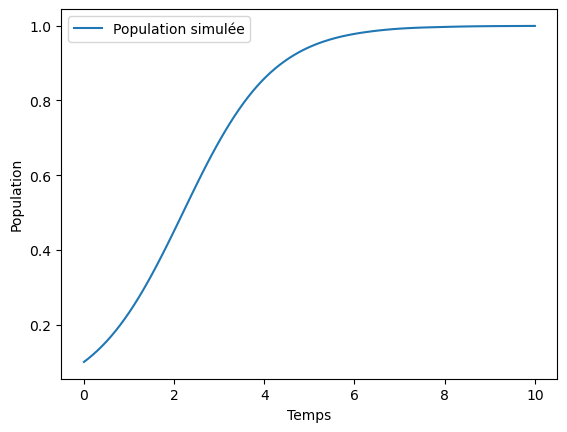

In [5]:
from scipy.integrate import solve_ivp

def logistic_growth(t, y):
    return y -y**2

t_span=[0, 10]
y0=[0.1]
t_eval=np.linspace(t_span[0], t_span[1], 100)
sol=solve_ivp(logistic_growth, t_span, y0, t_eval=t_eval)

plt.plot(sol.t,sol.y[0],label='Population simulée')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.show()

### Phase d' Entraînement

Ensuite, nous exploitons scikit-learn pour entraîner notre modèle. Bien que notre problème soit non linéaire, illustrant ainsi les complexités des problématiques liées aux équations différentielles, nous optons pour débuter avec un modèle linéaire dans le but de simplifier le processus. On décide également d'allouer au  modèle  80 points pour l'entraînement et 20 points pour le test.( X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42))

MSE: 0.007138261556996981


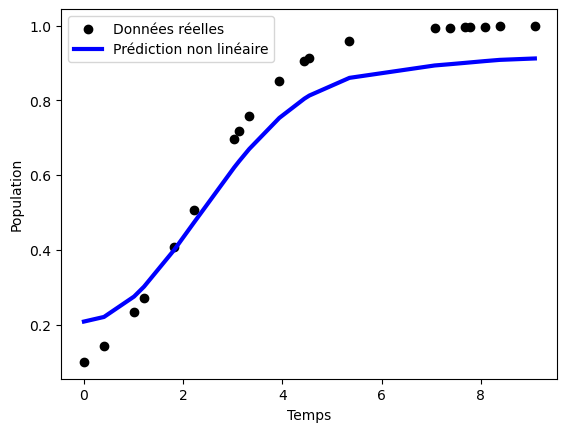

In [9]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
X = sol.t.reshape(-1, 1)  
y = sol.y.reshape(-1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVR()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


X_test_sorted = X_test[sorted_indices]
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]


plt.scatter(X_test, y_test, color='black', label='Données réelles')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', linewidth=3, label='Prédiction non linéaire')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()
plt.show()


## Observations et Conclusions

Malgré la simplicité du modèle linéaire utilisé, l'erreur quadratique moyenne relativement faible (0,017)<0,05 suggère que le modèle a pu capturer une partie de la tendance des données. Cependatn, bien que notre modèle de régression linéaire ne soit pas l'idéal pour capturer la complexité du système modélisé par l'équation, cette approche illustre comment les techniques de Machine Learning peuvent être appliquées à des données issues de modèles mathématiques continus pour en faire des prédictions.Il est clair qu'un modèle polynomial ou un réseau de neurones pourrait être envisagé pour plus de précisions !

***Adrien Clair***